# k-NearestNeighbors Fruits Data Set

### Improvement on existing k-NN classification results by generating intensive features from extensive features

In [1]:
import pandas as pd

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


The features of this data set include: mass, width, height, color score. With these features alone the best we can get with k-NN is:

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = fruits[['color_score', 'mass', 'height','width']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print('k-NN predicts the the test set correct {}% of the time'.format(knn.score(X_test, y_test)*100))

0.6
k-NN predicts the the test set correct 60.0% of the time


**However, by simply modeling the fruits as ellipsoids using the mass, height, and width features to obtain a density (an intensive property) we can achieve significantly better results (93% accuracy):** 

![Ellipsoid](https://i.imgur.com/EoqtA9x.png?1)
<center>**An ellipsoid**</center>

In [4]:
fruits['volume'] = ((4/3)*np.pi*(fruits['width']))*(np.square(fruits['height']))
fruits['density'] = (fruits['mass']/fruits['volume'])
fruits['ratio'] = fruits['width']/fruits['height']

X = fruits[['color_score', 'density', 'ratio']]
y = fruits['fruit_label']

X_trainF, X_testF, y_trainF, y_testF = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_trainF, y_trainF)
print('\n',knn.score(X_testF, y_testF))
print('\nk-NN predicts the the test set correct {}% of the time'.format(knn.score(X_testF, y_testF)*100))


 0.933333333333

k-NN predicts the the test set correct 93.33333333333333% of the time


**Additional plots** for visualization of the features and how accuracy varies as k varies.

<IPython.core.display.Javascript object>


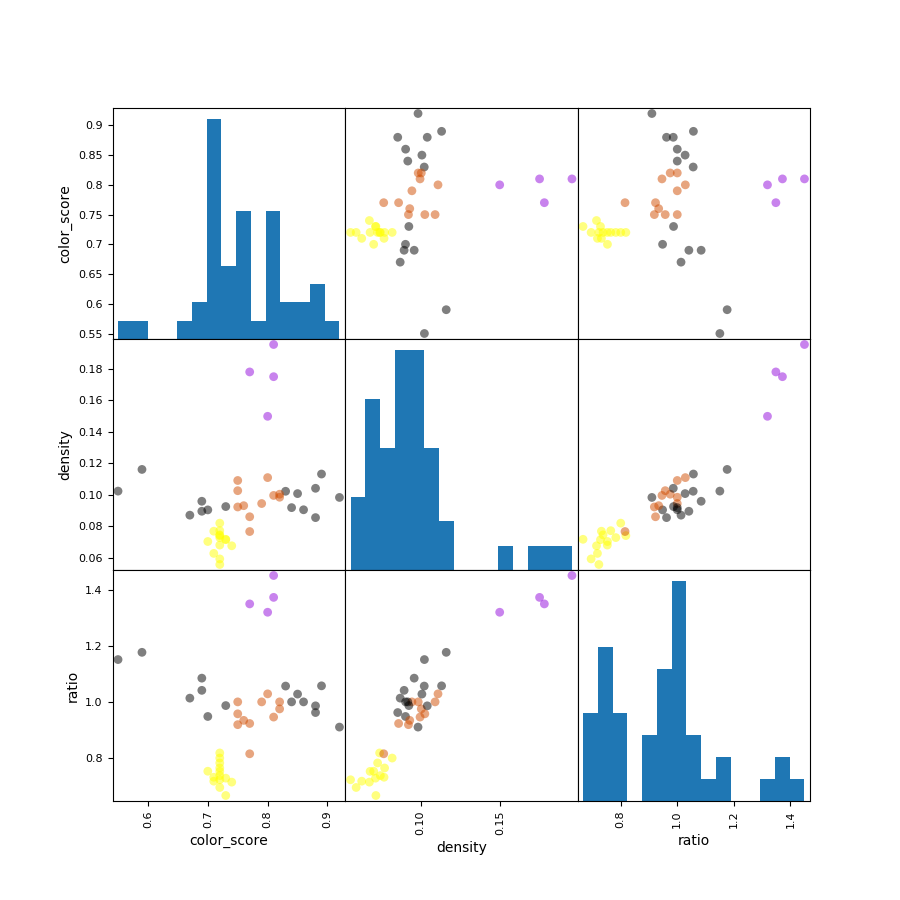

<IPython.core.display.Javascript object>


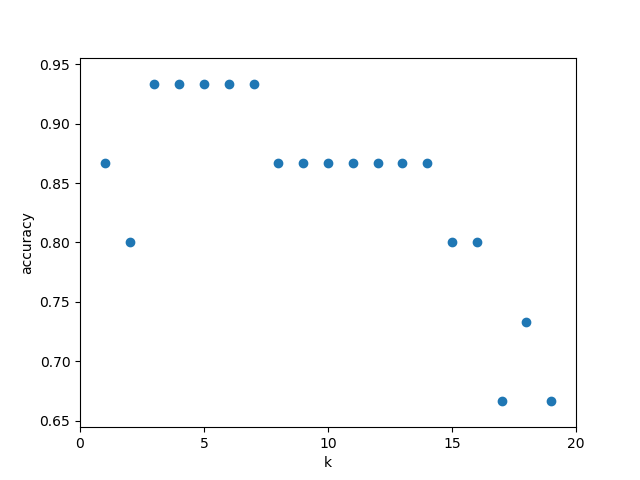

<IPython.core.display.Javascript object>


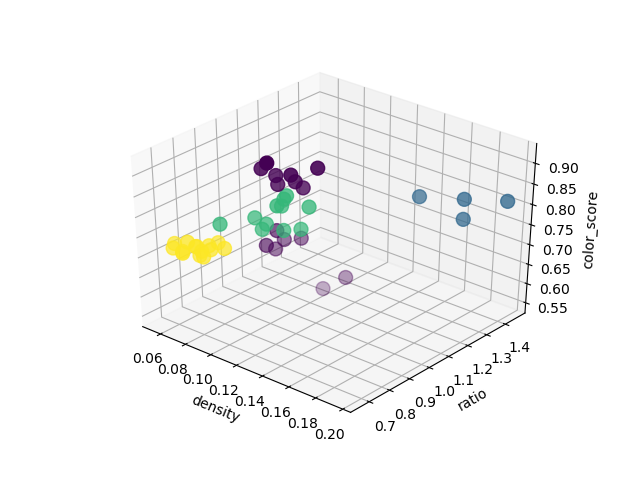

Text(0.5,0,'color_score')

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_trainF, c= y_trainF, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_trainF, y_trainF)
    scores.append(knn.score(X_testF, y_testF))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

# plotting a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_trainF['density'], X_trainF['ratio'], X_trainF['color_score'], c = y_trainF, marker = 'o', s=100)
ax.set_xlabel('density')
ax.set_ylabel('ratio')
ax.set_zlabel('color_score')